In [177]:
# Import dependencies
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import glob
import datetime
import time
import json
import spotipy

client_id = "9ab504ff3c144d03924e45bd7cae5168"
client_secret = "secret"

from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [11]:
# merge viral 50 for January
files = glob.glob('/Users/amber/Desktop/GitHub/project-one/Data/viral_50/jan/*.csv')
jan_viral_50 = pd.concat([pd.read_csv(fp).assign(Filename=os.path.basename(fp)) for fp in files])


jan_viral_50['Month']=''
jan_viral_50['Week Number']=''
jan_viral_50['Type']=''

# Extract Date from Filename using slice
jan_viral_50['Date'] = jan_viral_50['Filename'].str.slice(16,26)

# Convert to datetime
jan_viral_50['Date'] = pd.to_datetime(jan_viral_50['Date'])

# Get Week Number from Date
jan_viral_50['Week Number'] = jan_viral_50['Date'].dt.isocalendar().week

for index, row in jan_viral_50.iterrows():
    jan_viral_50.loc[index, 'Month'] = 'January'
    jan_viral_50.loc[index, 'Type'] = 'Viral 50'

jan_viral_50.to_csv('/Users/amber/Desktop/GitHub/project-one/Data/viral_50/jan/jan_viral_50.csv')

jan_viral_50.head()

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date
0,1,The Box,Roddy Ricch,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09
1,2,"All I Want - From ""High School Musical: The Mu...",Olivia Rodrigo,https://open.spotify.com/track/4Yxc55NX3tAXC2m...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09
2,3,Blueberry Fergo,Lil Monet,https://open.spotify.com/track/6CrMU5zXlKNGsip...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09
3,4,GOODMORNINGTOKYO!,TOKYO’S REVENGE,https://open.spotify.com/track/0Q2n5yzl2XRqYbV...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09
4,5,Kraazy,Likybo,https://open.spotify.com/track/3s2Qd1rsWqbvOox...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09


In [14]:
# create columns for Spotify data
jan_viral_50['Artist ID'] = ''
jan_viral_50['Genre 1'] = ''
jan_viral_50['Genre 2'] = ''
jan_viral_50['Genre 3'] = ''

# create list to collect artist ID
artist_id = []

# loop to go through dataframe and pull artist ID
for index, row in jan_viral_50.iterrows():
    track_id = row['URL']
    track_features = sp.track(track_id)
    jan_viral_50.loc[index, 'Artist ID'] = track_features['album']['artists'][0]['id']
    time.sleep(1.01)

# loop to go through dataframe and pull genres
for index, row in jan_viral_50.iterrows():
    genre_id = row['Artist ID']
    artist_features = sp.artist(genre_id)
    try:
        jan_viral_50.loc[index, 'Genre 1'] = artist_features['genres'][0]
        jan_viral_50.loc[index, 'Genre 2'] = artist_features['genres'][1]
        jan_viral_50.loc[index, 'Genre 3'] = artist_features['genres'][2]
    except (IndexError, KeyError):
        print(f'No genre found...skipping.')
    time.sleep(1.01)

jan_viral_50.head()

No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
N

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,1,The Box,Roddy Ricch,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,757aE44tKEUQEqRuT6GnEB,melodic rap,rap,trap
1,2,"All I Want - From ""High School Musical: The Mu...",Olivia Rodrigo,https://open.spotify.com/track/4Yxc55NX3tAXC2m...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,4Ywiqc8KxAECFoOWWAYry4,,,
2,3,Blueberry Fergo,Lil Monet,https://open.spotify.com/track/6CrMU5zXlKNGsip...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,16Nc36xAtNyQ7BMBcDsaLv,cali rap,,
3,4,GOODMORNINGTOKYO!,TOKYO’S REVENGE,https://open.spotify.com/track/0Q2n5yzl2XRqYbV...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,1McMsnEElThX1knmY4oliG,pop,post-teen pop,
4,5,Kraazy,Likybo,https://open.spotify.com/track/3s2Qd1rsWqbvOox...,viral-us-weekly-2020-01-09--2020-01-09.csv,January,2,Viral 50,2020-01-09,5TbLOwv8BNnik3f03NZJlt,meme rap,sad rap,vapor trap


In [187]:
# consolidate genres for jan viral 50

jan_genre_data_50 = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    
    'Count': [len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('rap|hip hop|trap') | jan_viral_50['Genre 2'].str.contains('rap|hip hop|trap') | jan_viral_50['Genre 3'].str.contains('rap|hip hop|trap')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('r&b|soul|blues') | jan_viral_50['Genre 2'].str.contains('r&b|soul|blues') | jan_viral_50['Genre 3'].str.contains('r&b|soul|blues')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('pop') | jan_viral_50['Genre 2'].str.contains('pop') | jan_viral_50['Genre 3'].str.contains('pop')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('rock') | jan_viral_50['Genre 2'].str.contains('rock') | jan_viral_50['Genre 3'].str.contains('rock')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('country') | jan_viral_50['Genre 2'].str.contains('country') | jan_viral_50['Genre 3'].str.contains('country')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('latin') | jan_viral_50['Genre 2'].str.contains('latin') | jan_viral_50['Genre 3'].str.contains('latin')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('disco') | jan_viral_50['Genre 2'].str.contains('disco') | jan_viral_50['Genre 3'].str.contains('disco')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('indie') | jan_viral_50['Genre 2'].str.contains('indie') | jan_viral_50['Genre 3'].str.contains('indie')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('house|edm') | jan_viral_50['Genre 2'].str.contains('house|edm') | jan_viral_50['Genre 3'].str.contains('house|edm')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('alt|alternative') | jan_viral_50['Genre 2'].str.contains('alt|alternative') | jan_viral_50['Genre 3'].str.contains('alt|alternative')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('glitchcore') | jan_viral_50['Genre 2'].str.contains('glitchcore') | jan_viral_50['Genre 3'].str.contains('glitchcore')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('brooklyn drill') | jan_viral_50['Genre 2'].str.contains('brooklyn drill') | jan_viral_50['Genre 3'].str.contains('brooklyn drill')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('halloween') | jan_viral_50['Genre 2'].str.contains('halloween') | jan_viral_50['Genre 3'].str.contains('halloween')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('christmas') | jan_viral_50['Genre 2'].str.contains('christmas') | jan_viral_50['Genre 3'].str.contains('christmas')]), len(jan_viral_50[jan_viral_50['Genre 1'].str.contains('classical') | jan_viral_50['Genre 2'].str.contains('classical') | jan_viral_50['Genre 3'].str.contains('classical')])]
}

# create new dataframe
jan_genre_df = pd.DataFrame(jan_genre_data_50)

# drop genres with zero counts
zero_counts = jan_genre_df[jan_genre_df['Count'] == 0].index
jan_genre_nozero_df = jan_genre_df.drop(zero_counts)

# show dataframe
jan_genre_nozero_df

,Genre,Count
0,Rap/Hip Hop/Trap,80
1,R&B/Soul/Blues,20
2,Pop,112
3,Rock,4
4,Country,12
5,Latin,8
7,Indie,12
8,House/EDM,8
9,Alternative/Alt,32


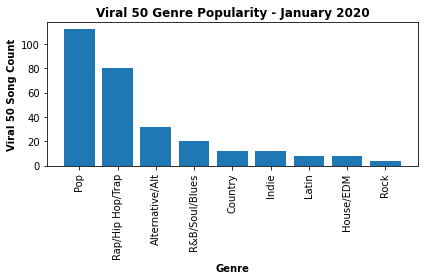

In [188]:
# create bar chart of viral 50 genre popularity - jan 2020

# sort values by count of viral song genre
jan_genre_df_sort = jan_genre_nozero_df.sort_values('Count', ascending=False)

#set x and y axis values
x = jan_genre_df_sort['Genre']
y = jan_genre_df_sort['Count']

# plot the bar chart
plt.bar(x, y)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel('Genre', weight='bold')
plt.ylabel('Viral 50 Song Count', weight='bold')
plt.title('Viral 50 Genre Popularity - January 2020', weight='bold')
plt.savefig('/Users/amber/Desktop/GitHub/project-one/Images/viral_50_jan_genres.png',
            bbox_inches='tight',
            pad_inches=.25,
            facecolor='white',
            orientation='landscape')
plt.tight_layout()
plt.show()

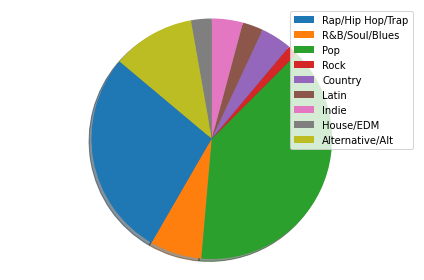

In [189]:
labels = jan_genre_nozero_df['Genre']
sizes = jan_genre_nozero_df['Count']

patches, text = plt.pie(sizes, shadow=True, startangle=140)
plt.legend(patches, labels, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [15]:
# top 200 slicing is (19,29)

# merge viral 50 for March
files = glob.glob('/Users/amber/Desktop/GitHub/project-one/Data/viral_50/mar/*.csv')
mar_viral_50 = pd.concat([pd.read_csv(fp).assign(Filename=os.path.basename(fp)) for fp in files])

mar_viral_50['Month']=''
mar_viral_50['Week Number']=''
mar_viral_50['Type']=''

# Extract Date from Filename using slice
mar_viral_50['Date'] = mar_viral_50['Filename'].str.slice(16,26)

# Convert to datetime
mar_viral_50['Date'] = pd.to_datetime(mar_viral_50['Date'])

# Get Week Number from Date
mar_viral_50['Week Number'] = mar_viral_50['Date'].dt.isocalendar().week

for index, row in mar_viral_50.iterrows():
    mar_viral_50.loc[index, 'Month'] = 'March'
    mar_viral_50.loc[index, 'Type'] = 'Viral 50'

mar_viral_50.to_csv('/Users/amber/Desktop/GitHub/project-one/Data/viral_50/mar/mar_viral_50.csv')

mar_viral_50.head()

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date
0,1,Skechers,DripReport,https://open.spotify.com/track/2alc8VZAzDgdAsL...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26
1,2,ily (i love you baby) (feat. Emilee),Surf Mesa,https://open.spotify.com/track/62aP9fBQKYKxi7P...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26
2,3,Miss Me,Joseph Black,https://open.spotify.com/track/5y6wOadQ0RZfGZk...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26
3,4,death bed (coffee for your head),Powfu,https://open.spotify.com/track/7eJMfftS33KTjuF...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26
4,5,Supalonely,BENEE,https://open.spotify.com/track/4nK5YrxbMGZstTL...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26


In [16]:
# create columns for Spotify data
mar_viral_50['Artist ID'] = ''
mar_viral_50['Genre 1'] = ''
mar_viral_50['Genre 2'] = ''
mar_viral_50['Genre 3'] = ''

# create list to collect artist ID
artist_id = []

# loop to go through dataframe and pull artist ID
for index, row in mar_viral_50.iterrows():
    track_id = row['URL']
    track_features = sp.track(track_id)
    mar_viral_50.loc[index, 'Artist ID'] = track_features['album']['artists'][0]['id']
    time.sleep(1.01)

# loop to go through dataframe and pull genres
for index, row in mar_viral_50.iterrows():
    genre_id = row['Artist ID']
    artist_features = sp.artist(genre_id)
    try:
        mar_viral_50.loc[index, 'Genre 1'] = artist_features['genres'][0]
        mar_viral_50.loc[index, 'Genre 2'] = artist_features['genres'][1]
        mar_viral_50.loc[index, 'Genre 3'] = artist_features['genres'][2]
    except (IndexError, KeyError):
        print(f'No genre found...skipping.')
    time.sleep(1.01)

mar_viral_50.head()

No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
N

,Position,Track Name,Artist,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,1,Skechers,DripReport,https://open.spotify.com/track/2alc8VZAzDgdAsL...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,3O5HD95HTEPgoPFOjAb7yV,viral rap,,
1,2,ily (i love you baby) (feat. Emilee),Surf Mesa,https://open.spotify.com/track/62aP9fBQKYKxi7P...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,6bmlMHgSheBauioMgKv2tn,emo rap,sad rap,
2,3,Miss Me,Joseph Black,https://open.spotify.com/track/5y6wOadQ0RZfGZk...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,1lmU3giNF3CSbkVSQmLpHQ,tropical house,,
3,4,death bed (coffee for your head),Powfu,https://open.spotify.com/track/7eJMfftS33KTjuF...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,0DbBBj0ScPumRqKXswGQH1,viral rap,,
4,5,Supalonely,BENEE,https://open.spotify.com/track/4nK5YrxbMGZstTL...,viral-us-weekly-2020-03-26--2020-03-26.csv,March,13,Viral 50,2020-03-26,0Cp8WN4V8Tu4QJQwCN5Md4,alt z,nz pop,pop


In [191]:
mar_genre_data_50 = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    
    'Count': [len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('rap|hip hop|trap') | mar_viral_50['Genre 2'].str.contains('rap|hip hop|trap') | mar_viral_50['Genre 3'].str.contains('rap|hip hop|trap')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('r&b|soul|blues') | mar_viral_50['Genre 2'].str.contains('r&b|soul|blues') | mar_viral_50['Genre 3'].str.contains('r&b|soul|blues')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('pop') | mar_viral_50['Genre 2'].str.contains('pop') | mar_viral_50['Genre 3'].str.contains('pop')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('rock') | mar_viral_50['Genre 2'].str.contains('rock') | mar_viral_50['Genre 3'].str.contains('rock')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('country') | mar_viral_50['Genre 2'].str.contains('country') | mar_viral_50['Genre 3'].str.contains('country')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('latin') | mar_viral_50['Genre 2'].str.contains('latin') | mar_viral_50['Genre 3'].str.contains('latin')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('disco') | mar_viral_50['Genre 2'].str.contains('disco') | mar_viral_50['Genre 3'].str.contains('disco')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('indie') | mar_viral_50['Genre 2'].str.contains('indie') | mar_viral_50['Genre 3'].str.contains('indie')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('house|edm') | mar_viral_50['Genre 2'].str.contains('house|edm') | mar_viral_50['Genre 3'].str.contains('house|edm')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('alt|alternative') | mar_viral_50['Genre 2'].str.contains('alt|alternative') | mar_viral_50['Genre 3'].str.contains('alt|alternative')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('glitchcore') | mar_viral_50['Genre 2'].str.contains('glitchcore') | mar_viral_50['Genre 3'].str.contains('glitchcore')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('brooklyn drill') | mar_viral_50['Genre 2'].str.contains('brooklyn drill') | mar_viral_50['Genre 3'].str.contains('brooklyn drill')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('halloween') | mar_viral_50['Genre 2'].str.contains('halloween') | mar_viral_50['Genre 3'].str.contains('halloween')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('christmas') | mar_viral_50['Genre 2'].str.contains('christmas') | mar_viral_50['Genre 3'].str.contains('christmas')]), len(mar_viral_50[mar_viral_50['Genre 1'].str.contains('classical') | mar_viral_50['Genre 2'].str.contains('classical') | mar_viral_50['Genre 3'].str.contains('classical')])]
}

mar_genre_df = pd.DataFrame(mar_genre_data_50)

# drop genres with zero counts
zero_counts = mar_genre_df[mar_genre_df['Count'] == 0].index
mar_genre_nozero_df = mar_genre_df.drop(zero_counts)

mar_genre_nozero_df

,Genre,Count
0,Rap/Hip Hop/Trap,100
1,R&B/Soul/Blues,32
2,Pop,72
3,Rock,4
4,Country,8
5,Latin,8
7,Indie,12
8,House/EDM,12
9,Alternative/Alt,28
11,Brooklyn Drill,8


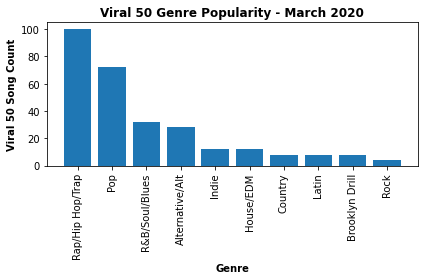

In [192]:
# create bar chart of viral 50 genre popularity - mar 2020
mar_genre_df_sort = mar_genre_nozero_df.sort_values('Count', ascending=False)

x = mar_genre_df_sort['Genre']
y = mar_genre_df_sort['Count']

plt.bar(x, y)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel('Genre', weight='bold')
plt.ylabel('Viral 50 Song Count', weight='bold')
plt.title('Viral 50 Genre Popularity - March 2020', weight='bold')
plt.savefig('/Users/amber/Desktop/GitHub/project-one/Images/viral_50_mar_genres.png',
            bbox_inches='tight',
            pad_inches=.25,
            facecolor='white',
            orientation='landscape')
plt.tight_layout()
plt.show()

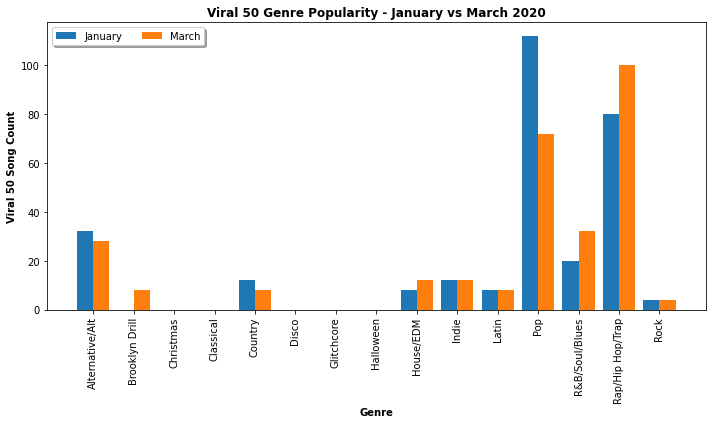

In [193]:
# Create Double Bar Chart for Month-to-Month comparison - Viral 50 - Jan vs Mar

# sort genre alphabetically
jan_genre_df_alpha = jan_genre_df.sort_values('Genre')
mar_genre_df_alpha = mar_genre_df.sort_values('Genre')

# set up plot
fix, ax = plt.subplots(figsize=(10,6))
x = np.arange(len(jan_genre_df_alpha['Genre'].unique()))

# set bar width to be half of typical
bar_width = 0.4

# set bar values
b1 = ax.bar(x, jan_genre_df_alpha['Count'], width=bar_width, label='January')
b2 = ax.bar(x + bar_width, mar_genre_df_alpha['Count'], width=bar_width, label='March')

# set x-axis tick locations and labels
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(jan_genre_df_alpha['Genre'], rotation=90)

# plot legend
ax.legend(loc='upper left', shadow=True, ncol=2)

# plot titles and axis labels, save figure
plt.title('Viral 50 Genre Popularity - January vs March 2020', weight='bold')
plt.xlabel('Genre', weight='bold')
plt.ylabel('Viral 50 Song Count', weight='bold')
plt.savefig('/Users/amber/Desktop/GitHub/project-one/Images/viral_50_janvmar_genres.png',
            bbox_inches='tight',
            pad_inches=.25,
            facecolor='white',
            orientation='landscape')

# show the chart
plt.tight_layout()
plt.show()

In [123]:
# top 200 slicing is (19,29)

# merge top 200 for January
files = glob.glob('/Users/amber/Desktop/GitHub/project-one/Data/top_200/jan/*.csv')
jan_top_200 = pd.concat([pd.read_csv(fp, skiprows=[0], skip_blank_lines=True).assign(Filename=os.path.basename(fp)) for fp in files])

jan_top_200['Month']=''
jan_top_200['Week Number']=''
jan_top_200['Type']=''

# Extract Date from Filename using slice
jan_top_200['Date'] = jan_top_200['Filename'].str.slice(19,29)

# Convert to datetime
jan_top_200['Date'] = pd.to_datetime(jan_top_200['Date'])

# Get Week Number from Date
jan_top_200['Week Number'] = jan_top_200['Date'].dt.isocalendar().week

for index, row in jan_top_200.iterrows():
    jan_top_200.loc[index, 'Month'] = 'January'
    jan_top_200.loc[index, 'Type'] = 'Top 200'

jan_top_200 = jan_top_200.sort_values(['Week Number', 'Position'], ascending=True)

jan_top_200.to_csv('/Users/amber/Desktop/GitHub/project-one/Data/top_200/jan/jan_top_200.csv')

jan_top_200.head()

,Position,Track Name,Artist,Streams,URL,Filename,Month,Week Number,Type,Date
0,1,The Box,Roddy Ricch,18952305,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,regional-us-weekly-2020-01-03--2020-01-10.csv,January,1,Top 200,2020-01-03
1,2,ROXANNE,Arizona Zervas,9671478,https://open.spotify.com/track/696DnlkuDOXcMAn...,regional-us-weekly-2020-01-03--2020-01-10.csv,January,1,Top 200,2020-01-03
2,3,Yummy,Justin Bieber,9648561,https://open.spotify.com/track/41L3O37CECZt3N7...,regional-us-weekly-2020-01-03--2020-01-10.csv,January,1,Top 200,2020-01-03
3,4,Circles,Post Malone,8244725,https://open.spotify.com/track/21jGcNKet2qwijl...,regional-us-weekly-2020-01-03--2020-01-10.csv,January,1,Top 200,2020-01-03
4,5,BOP,DaBaby,7985170,https://open.spotify.com/track/6Ozh9Ok6h4Oi1wU...,regional-us-weekly-2020-01-03--2020-01-10.csv,January,1,Top 200,2020-01-03


In [126]:
# get Genre information of Top 200 for January

# create columns for Spotify data
jan_top_200['Artist ID'] = ''
jan_top_200['Genre 1'] = ''
jan_top_200['Genre 2'] = ''
jan_top_200['Genre 3'] = ''

# create list to collect artist ID
artist_id = []

# loop to go through dataframe and pull artist ID
for index, row in jan_top_200.iterrows():
    track_id = row['URL']
    track_features = sp.track(track_id)
    jan_top_200.loc[index, 'Artist ID'] = track_features['album']['artists'][0]['id']
    time.sleep(1.01)

# loop to go through dataframe and pull genres
for index, row in jan_top_200.iterrows():
    genre_id = row['Artist ID']
    artist_features = sp.artist(genre_id)
    try:
        jan_top_200.loc[index, 'Genre 1'] = artist_features['genres'][0]
        jan_top_200.loc[index, 'Genre 2'] = artist_features['genres'][1]
        jan_top_200.loc[index, 'Genre 3'] = artist_features['genres'][2]
    except (IndexError, KeyError):
        print(f'No genre found...skipping.')
    time.sleep(1.01)

jan_top_200.head()

No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
N

,Position,Track Name,Artist,Streams,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,1,The Box,Roddy Ricch,18952305,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,regional-us-weekly-2020-01-03--2020-01-10.csv,January,1,Top 200,2020-01-03,757aE44tKEUQEqRuT6GnEB,melodic rap,rap,trap
1,2,ROXANNE,Arizona Zervas,9671478,https://open.spotify.com/track/696DnlkuDOXcMAn...,regional-us-weekly-2020-01-03--2020-01-10.csv,January,1,Top 200,2020-01-03,1RyvyyTE3xzB2ZywiAwp0i,atl hip hop,pop rap,rap
2,3,Yummy,Justin Bieber,9648561,https://open.spotify.com/track/41L3O37CECZt3N7...,regional-us-weekly-2020-01-03--2020-01-10.csv,January,1,Top 200,2020-01-03,7dGJo4pcD2V6oG8kP0tJRR,detroit hip hop,hip hop,rap
3,4,Circles,Post Malone,8244725,https://open.spotify.com/track/21jGcNKet2qwijl...,regional-us-weekly-2020-01-03--2020-01-10.csv,January,1,Top 200,2020-01-03,0vRvGUQVUjytro0xpb26bs,pop rap,rhode island rap,
4,5,BOP,DaBaby,7985170,https://open.spotify.com/track/6Ozh9Ok6h4Oi1wU...,regional-us-weekly-2020-01-03--2020-01-10.csv,January,1,Top 200,2020-01-03,4r63FhuTkUYltbVAg5TQnk,north carolina hip hop,rap,


In [128]:
# save top 200 for January with genres to CSV
jan_top_200.to_csv("/Users/amber/Desktop/GitHub/project-one/Data/top_200/jan/jan_top_200_genres.csv", encoding = 'utf-8')

In [132]:
# consolidate genres for jan top 200

jan_genre_data_200 = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    
    'Count': [len(jan_top_200[jan_top_200['Genre 1'].str.contains('rap|hip hop|trap') | jan_top_200['Genre 2'].str.contains('rap|hip hop|trap') | jan_top_200['Genre 3'].str.contains('rap|hip hop|trap')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('r&b|soul|blues') | jan_top_200['Genre 2'].str.contains('r&b|soul|blues') | jan_top_200['Genre 3'].str.contains('r&b|soul|blues')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('pop') | jan_top_200['Genre 2'].str.contains('pop') | jan_top_200['Genre 3'].str.contains('pop')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('rock') | jan_top_200['Genre 2'].str.contains('rock') | jan_top_200['Genre 3'].str.contains('rock')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('country') | jan_top_200['Genre 2'].str.contains('country') | jan_top_200['Genre 3'].str.contains('country')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('latin') | jan_top_200['Genre 2'].str.contains('latin') | jan_top_200['Genre 3'].str.contains('latin')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('disco') | jan_top_200['Genre 2'].str.contains('disco') | jan_top_200['Genre 3'].str.contains('disco')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('indie') | jan_top_200['Genre 2'].str.contains('indie') | jan_top_200['Genre 3'].str.contains('indie')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('house|edm') | jan_top_200['Genre 2'].str.contains('house|edm') | jan_top_200['Genre 3'].str.contains('house|edm')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('alt|alternative') | jan_top_200['Genre 2'].str.contains('alt|alternative') | jan_top_200['Genre 3'].str.contains('alt|alternative')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('glitchcore') | jan_top_200['Genre 2'].str.contains('glitchcore') | jan_top_200['Genre 3'].str.contains('glitchcore')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('brooklyn drill') | jan_top_200['Genre 2'].str.contains('brooklyn drill') | jan_top_200['Genre 3'].str.contains('brooklyn drill')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('halloween') | jan_top_200['Genre 2'].str.contains('halloween') | jan_top_200['Genre 3'].str.contains('halloween')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('christmas') | jan_top_200['Genre 2'].str.contains('christmas') | jan_top_200['Genre 3'].str.contains('christmas')]), len(jan_top_200[jan_top_200['Genre 1'].str.contains('classical') | jan_top_200['Genre 2'].str.contains('classical') | jan_top_200['Genre 3'].str.contains('classical')])]
}

jan_genre_200_df = pd.DataFrame(jan_genre_data_200)
jan_genre_200_df

,Genre,Count
0,Rap/Hip Hop/Trap,512
1,R&B/Soul/Blues,48
2,Pop,384
3,Rock,4
4,Country,32
5,Latin,12
6,Disco,0
7,Indie,4
8,House/EDM,32
9,Alternative/Alt,40


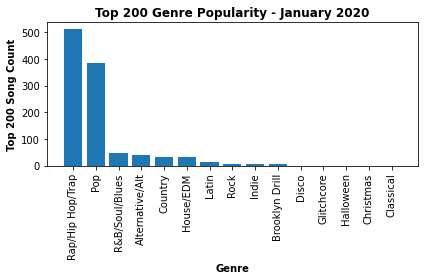

In [145]:
# create bar chart of top 200 genre popularity - jan 2020
jan_genre_200_df_sort = jan_genre_200_df.sort_values('Count', ascending=False)

x = jan_genre_200_df_sort['Genre']
y = jan_genre_200_df_sort['Count']

plt.bar(x, y)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel('Genre', weight='bold')
plt.ylabel('Top 200 Song Count', weight='bold')
plt.title('Top 200 Genre Popularity - January 2020', weight='bold')
plt.savefig('/Users/amber/Desktop/GitHub/project-one/Images/top_200_jan_genres.png',
            bbox_inches='tight',
            pad_inches=.25,
            facecolor='white',
            orientation='landscape')
plt.tight_layout()
plt.show()

In [124]:
# top 200 slicing is (19,29)

# merge top 200 for March
files = glob.glob('/Users/amber/Desktop/GitHub/project-one/Data/top_200/mar/*.csv')
mar_top_200 = pd.concat([pd.read_csv(fp, skiprows=[0], skip_blank_lines=True).assign(Filename=os.path.basename(fp)) for fp in files])

mar_top_200['Month']=''
mar_top_200['Week Number']=''
mar_top_200['Type']=''

# Extract Date from Filename using slice
mar_top_200['Date'] = mar_top_200['Filename'].str.slice(19,29)

# Convert to datetime
mar_top_200['Date'] = pd.to_datetime(mar_top_200['Date'])

# Get Week Number from Date
mar_top_200['Week Number'] = mar_top_200['Date'].dt.isocalendar().week

for index, row in mar_top_200.iterrows():
    mar_top_200.loc[index, 'Month'] = 'March'
    mar_top_200.loc[index, 'Type'] = 'Top 200'

mar_top_200 = mar_top_200.sort_values(['Week Number', 'Position'], ascending=True)

mar_top_200.to_csv('/Users/amber/Desktop/GitHub/project-one/Data/top_200/mar/mar_top_200.csv')

mar_top_200.head()

,Position,Track Name,Artist,Streams,URL,Filename,Month,Week Number,Type,Date
0,1,The Box,Roddy Ricch,15264900,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,regional-us-weekly-2020-02-28--2020-03-06.csv,March,9,Top 200,2020-02-28
1,2,Blinding Lights,The Weeknd,8663011,https://open.spotify.com/track/0sf12qNH5qcw8qp...,regional-us-weekly-2020-02-28--2020-03-06.csv,March,9,Top 200,2020-02-28
2,3,Say So,Doja Cat,8494545,https://open.spotify.com/track/3Dv1eDb0MEgF93G...,regional-us-weekly-2020-02-28--2020-03-06.csv,March,9,Top 200,2020-02-28
3,4,Blueberry Faygo,Lil Mosey,8366456,https://open.spotify.com/track/22LAwLoDA5b4AaG...,regional-us-weekly-2020-02-28--2020-03-06.csv,March,9,Top 200,2020-02-28
4,5,Intentions (feat. Quavo),Justin Bieber,8139379,https://open.spotify.com/track/4umIPjkehX1r7uh...,regional-us-weekly-2020-02-28--2020-03-06.csv,March,9,Top 200,2020-02-28


In [127]:
# get Genre information of Top 200 for March

# create columns for Spotify data
mar_top_200['Artist ID'] = ''
mar_top_200['Genre 1'] = ''
mar_top_200['Genre 2'] = ''
mar_top_200['Genre 3'] = ''

# create list to collect artist ID
artist_id = []

# loop to go through dataframe and pull artist ID
for index, row in mar_top_200.iterrows():
    track_id = row['URL']
    track_features = sp.track(track_id)
    mar_top_200.loc[index, 'Artist ID'] = track_features['album']['artists'][0]['id']
    time.sleep(1.01)

# loop to go through dataframe and pull genres
for index, row in mar_top_200.iterrows():
    genre_id = row['Artist ID']
    artist_features = sp.artist(genre_id)
    try:
        mar_top_200.loc[index, 'Genre 1'] = artist_features['genres'][0]
        mar_top_200.loc[index, 'Genre 2'] = artist_features['genres'][1]
        mar_top_200.loc[index, 'Genre 3'] = artist_features['genres'][2]
    except (IndexError, KeyError):
        print(f'No genre found...skipping.')
    time.sleep(1.01)

mar_top_200.head()

No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
No genre found...skipping.
N

,Position,Track Name,Artist,Streams,URL,Filename,Month,Week Number,Type,Date,Artist ID,Genre 1,Genre 2,Genre 3
0,1,The Box,Roddy Ricch,15264900,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,regional-us-weekly-2020-02-28--2020-03-06.csv,March,9,Top 200,2020-02-28,1Xyo4u8uXC1ZmMpatF05PJ,canadian contemporary r&b,canadian pop,pop
1,2,Blinding Lights,The Weeknd,8663011,https://open.spotify.com/track/0sf12qNH5qcw8qp...,regional-us-weekly-2020-02-28--2020-03-06.csv,March,9,Top 200,2020-02-28,757aE44tKEUQEqRuT6GnEB,melodic rap,rap,trap
2,3,Say So,Doja Cat,8494545,https://open.spotify.com/track/3Dv1eDb0MEgF93G...,regional-us-weekly-2020-02-28--2020-03-06.csv,March,9,Top 200,2020-02-28,1Xyo4u8uXC1ZmMpatF05PJ,canadian contemporary r&b,canadian pop,pop
3,4,Blueberry Faygo,Lil Mosey,8366456,https://open.spotify.com/track/22LAwLoDA5b4AaG...,regional-us-weekly-2020-02-28--2020-03-06.csv,March,9,Top 200,2020-02-28,1Xyo4u8uXC1ZmMpatF05PJ,canadian contemporary r&b,canadian pop,pop
4,5,Intentions (feat. Quavo),Justin Bieber,8139379,https://open.spotify.com/track/4umIPjkehX1r7uh...,regional-us-weekly-2020-02-28--2020-03-06.csv,March,9,Top 200,2020-02-28,5zctI4wO9XSKS8XwcnqEHk,melodic rap,rap,rap conscient


In [129]:
mar_top_200.to_csv("/Users/amber/Desktop/GitHub/project-one/Data/top_200/mar/mar_top_200_genres.csv", encoding = 'utf-8')

In [133]:
# consolidate genres for mar top 200

mar_genre_data_200 = {
    'Genre': ['Rap/Hip Hop/Trap', 'R&B/Soul/Blues',  'Pop', 'Rock', 'Country', 'Latin', 'Disco', 'Indie', 'House/EDM', 'Alternative/Alt', 'Glitchcore', 'Brooklyn Drill', 'Halloween', 'Christmas', 'Classical'],
    
    'Count': [len(mar_top_200[mar_top_200['Genre 1'].str.contains('rap|hip hop|trap') | mar_top_200['Genre 2'].str.contains('rap|hip hop|trap') | mar_top_200['Genre 3'].str.contains('rap|hip hop|trap')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('r&b|soul|blues') | mar_top_200['Genre 2'].str.contains('r&b|soul|blues') | mar_top_200['Genre 3'].str.contains('r&b|soul|blues')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('pop') | mar_top_200['Genre 2'].str.contains('pop') | mar_top_200['Genre 3'].str.contains('pop')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('rock') | mar_top_200['Genre 2'].str.contains('rock') | mar_top_200['Genre 3'].str.contains('rock')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('country') | mar_top_200['Genre 2'].str.contains('country') | mar_top_200['Genre 3'].str.contains('country')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('latin') | mar_top_200['Genre 2'].str.contains('latin') | mar_top_200['Genre 3'].str.contains('latin')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('disco') | mar_top_200['Genre 2'].str.contains('disco') | mar_top_200['Genre 3'].str.contains('disco')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('indie') | mar_top_200['Genre 2'].str.contains('indie') | mar_top_200['Genre 3'].str.contains('indie')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('house|edm') | mar_top_200['Genre 2'].str.contains('house|edm') | mar_top_200['Genre 3'].str.contains('house|edm')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('alt|alternative') | mar_top_200['Genre 2'].str.contains('alt|alternative') | mar_top_200['Genre 3'].str.contains('alt|alternative')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('glitchcore') | mar_top_200['Genre 2'].str.contains('glitchcore') | mar_top_200['Genre 3'].str.contains('glitchcore')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('brooklyn drill') | mar_top_200['Genre 2'].str.contains('brooklyn drill') | mar_top_200['Genre 3'].str.contains('brooklyn drill')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('halloween') | mar_top_200['Genre 2'].str.contains('halloween') | mar_top_200['Genre 3'].str.contains('halloween')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('christmas') | mar_top_200['Genre 2'].str.contains('christmas') | mar_top_200['Genre 3'].str.contains('christmas')]), len(mar_top_200[mar_top_200['Genre 1'].str.contains('classical') | mar_top_200['Genre 2'].str.contains('classical') | mar_top_200['Genre 3'].str.contains('classical')])]
}

mar_genre_200_df = pd.DataFrame(mar_genre_data_200)
mar_genre_200_df

,Genre,Count
0,Rap/Hip Hop/Trap,488
1,R&B/Soul/Blues,92
2,Pop,364
3,Rock,4
4,Country,32
5,Latin,44
6,Disco,0
7,Indie,8
8,House/EDM,28
9,Alternative/Alt,36


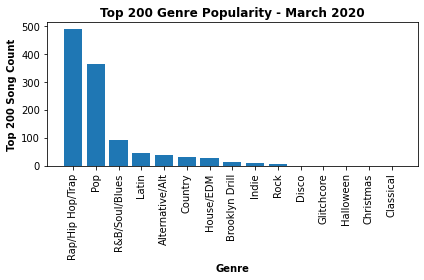

In [146]:
# create bar chart of top 200 genre popularity - mar 2020
mar_genre_200_df_sort = mar_genre_200_df.sort_values('Count', ascending=False)

x = mar_genre_200_df_sort['Genre']
y = mar_genre_200_df_sort['Count']

plt.bar(x, y)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel('Genre', weight='bold')
plt.ylabel('Top 200 Song Count', weight='bold')
plt.title('Top 200 Genre Popularity - March 2020', weight='bold')
plt.savefig('/Users/amber/Desktop/GitHub/project-one/Images/top_200_mar_genres.png',
            bbox_inches='tight',
            pad_inches=.25,
            facecolor='white',
            orientation='landscape')
plt.tight_layout()
plt.show()

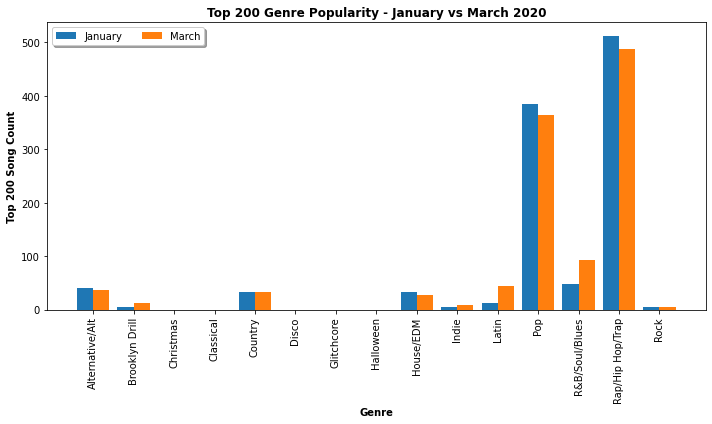

In [147]:
# Create Double Bar Chart for Month-to-Month comparison - Top 200 - Jan vs Mar

# sort genre alphabetically
jan_genre_200_df_alpha = jan_genre_200_df.sort_values('Genre')
mar_genre_200_df_alpha = mar_genre_200_df.sort_values('Genre')

# set up plot
fix, ax = plt.subplots(figsize=(10,6))
x = np.arange(len(jan_genre_200_df_alpha['Genre'].unique()))

# set bar width to be half of typical
bar_width = 0.4

# set bar values
b1 = ax.bar(x, jan_genre_200_df_alpha['Count'], width=bar_width, label='January')
b2 = ax.bar(x + bar_width, mar_genre_200_df_alpha['Count'], width=bar_width, label='March')

# set x-axis tick locations and labels
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(jan_genre_200_df_alpha['Genre'], rotation=90)

# plot legend
ax.legend(loc='upper left', shadow=True, ncol=2)

# plot titles and axis labels, save figure
plt.title('Top 200 Genre Popularity - January vs March 2020', weight='bold')
plt.xlabel('Genre', weight='bold')
plt.ylabel('Top 200 Song Count', weight='bold')
plt.savefig('/Users/amber/Desktop/GitHub/project-one/Images/top_200_janvmar_genres.png',
            bbox_inches='tight',
            pad_inches=.25,
            facecolor='white',
            orientation='landscape')

# show the chart
plt.tight_layout()
plt.show()